In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
dataset = pd.read_csv("train.csv")

# Dados para teste, diretamente é o test_x pois este já vem sem a ultima coluna, que é o valor a ser preditado (y), o preço da casa
test_x = pd.read_csv("test.csv")

# Printar rapidamente as 5 primeiras linhas pra ver se o carregamento foi ok
print(dataset.head())

# Como o aprendizado é supervisionado, precisamos tirar a ultima coluna (y, o valor que iremos validar a ser preditado)
X_train = dataset.iloc[:,:-1]
y_train = dataset.iloc[:, -1]

# Nao precisamos usar o train_test_split já que temos os dados separados pra treino/teste

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [111]:
print("O teste possui uma coluna a menos pois iremos preditar os valores, que é a última coluna faltante.")
print(test_x.head())

O teste possui uma coluna a menos pois iremos preditar os valores, que é a última coluna faltante.
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 Bldg

In [6]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [110]:
corr = dataset.corr() #[abs(dataset.corr()) > 0.8]
# Caso quiséssemos mostrar a tabela de todos os dados apenas com a correlação maior que 0.8
#dataset.corr() [abs(dataset.corr()) > 0.8]

In [21]:
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

In [43]:
# Variáveis escolhidas que possuem maior correlação com a nossa saída (valor a ser predito, i.e: SalePrice)
x1 = dataset['GrLivArea']
x2 = dataset['OverallQual']
# Pegamos essa aqui de teste
x3 = dataset['LotArea']

# Para regressão linear precisamos colocar os dados em forma de array
x1 = x1.to_numpy()
x2 = x2.to_numpy()
x3 = x3.to_numpy()
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x3 = x3.reshape(-1,1)

In [69]:
reg = LinearRegression()
reg2 = LinearRegression()
reg3 = LinearRegression()
reg_a = reg.fit(x1, y_train)
reg_b = reg2.fit(x2, y_train)
reg_c = reg3.fit(x3, y_train)

In [108]:
r1_train = reg_a.score(x1, y_train)
r2_train = reg_b.score(x2, y_train)
r3_train = reg_c.score(x3, y_train)
print("Resultados:")
print(r1_train,r2_train,r3_train)

Resultados:
0.5021486502718042 0.625651892462118 0.0696133153821118


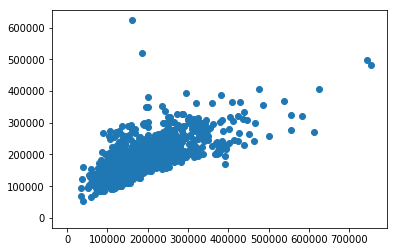

In [56]:
prediction = reg.predict(x1)
plt.scatter(y_train, prediction)
plt.plot([0, 50], [0, 50], '--k')

In [112]:
test_gr = test_x['GrLivArea']
test_overall = test_x['OverallQual']
test_lot = test_x['LotArea']

test_gr = test_gr.to_numpy()
test_overall = test_overall.to_numpy()
test_lot = test_lot.to_numpy()

test_gr = test_gr.reshape(-1,1)
test_overall = test_overall.reshape(-1,1)
test_lot = test_lot.reshape(-1,1)

#y_test = test_x.iloc[:, -1]
#y_test
# Não da pra fazer o teste pois a coluna pra fazer a validação fica guardada com o Kaggle (p nao enviesarmos nosso modelo)
#r1_test = reg.score(test_gr, y_test)

In [113]:
prediction1 = reg.predict(test_gr)
prediction2 = reg.predict(test_overall)
prediction3 = reg.predict(test_lot)

In [114]:
colunas = ['SalePrice']
pred1 = pd.DataFrame(data=prediction1, columns=colunas)
pred1.index.rename = 'Id'
pred1['Id'] = test_x['Id']
pred1.to_csv('reg1.csv', index=False, sep=',')

In [115]:
colunas = ['SalePrice']
pred2 = pd.DataFrame(data=prediction2, columns=colunas)
pred2.index.rename = 'Id'
pred2['Id'] = test_x['Id']
pred2.to_csv('reg2.csv', index=False, sep=',')

In [107]:
colunas = ['SalePrice']
pred3 = pd.DataFrame(data=prediction3, columns=colunas)
pred3.index.rename = 'Id'
pred3['Id'] = test_x['Id']
pred3.to_csv('reg3.csv', index=False, sep=',')